BANK MARKETING CAMPAIGN ANALYSIS

Understanding What Drives Term Deposit Subscription

1. BUSINESS PROBLEM:

-A portugese bank conducted a direct marketing campaign to promote term deposits;
-Customers were contacted primarly via phone calls, and the outcome of each interaction was recorded;
-The primarly objective of this analysis is to understand which factors influence a customer's decision to subscribe to a term deposit;
-By identifying key patterns in customer behaviour and campaign performance, the bank can optimize future marketing strategies, improve targeting and increase conversion rates.

2. DATA OVERVIEW:

-The dataset contains 45,211 rows and 17 columns;
-It includes both numeric and categorical variables, describing customer demographics, account information and marketing campaign details;
-The target variable is 'y', indicating whether a client subscribed to a term deposit.

3. DATA CLEANING / PREPROCESSING:

Before performing detailed analysis, it is important to clean and preprocess the data. This includes checking for missing values, handling duplicates, converting columns to appropiate data types and identifying any anomalies that could affect the analysis.

In [1]:
import pandas as pd
bank_df = pd.read_csv("C:/Users/user1/Desktop/Learn Python/Proiect 1 Bank Dataset/Bank.csv", sep=';')

bank_df.head()
bank_df.shape

(45211, 17)

In [2]:
bank_df.info()
bank_df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  str  
 2   marital    45211 non-null  str  
 3   education  45211 non-null  str  
 4   default    45211 non-null  str  
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  str  
 7   loan       45211 non-null  str  
 8   contact    45211 non-null  str  
 9   day        45211 non-null  int64
 10  month      45211 non-null  str  
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  str  
 16  y          45211 non-null  str  
dtypes: int64(7), str(10)
memory usage: 5.9 MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank_df.duplicated().sum()
bank_df = bank_df.drop_duplicates()

In [5]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', \
    'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_cols:
    bank_df[col] = bank_df[col].astype('category')
bank_df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [6]:
for col in categorical_cols:
    print(f"{col}: {bank_df[col].unique()}")

job: ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, str): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
marital: ['married', 'single', 'divorced']
Categories (3, str): ['divorced', 'married', 'single']
education: ['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, str): ['primary', 'secondary', 'tertiary', 'unknown']
default: ['no', 'yes']
Categories (2, str): ['no', 'yes']
housing: ['yes', 'no']
Categories (2, str): ['no', 'yes']
loan: ['no', 'yes']
Categories (2, str): ['no', 'yes']
contact: ['unknown', 'cellular', 'telephone']
Categories (3, str): ['cellular', 'telephone', 'unknown']
month: ['may', 'jun', 'jul', 'aug', 'oct', ..., 'jan', 'feb', 'mar', 'apr', 'sep']
Length: 12
Categories (12, str): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']
poutcome: ['unknown', 'failure

In [7]:
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank_df[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


3.1. SUMMARY / CONCLUSIONS:

-Dataset contains 45,211 rows and 17 columns;
-In the dataset, there are no missing values found;
-Also, there are no duplicate rows present;
-Categorical columns have been converted to appropiate types;
-Some numeric columns may contain outliers, these will be considered in further analysis.


4. EXPLORATORY DATA ANALYSIS (EDA):

In this section, we explore the dataset to uncover patterns and insights that can help us understand which factors influence a customer's decision to subscribe to a term deposit.
The main goals of this analysis are:

-Examine the distribution of the target variable 'y' (subscribed or not).

In [8]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

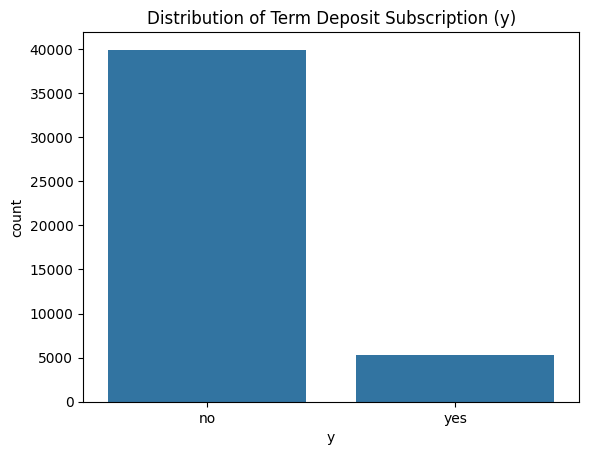

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [9]:
sns.countplot(x = 'y', data = bank_df)
plt.title('Distribution of Term Deposit Subscription (y)')
plt.show()

print(bank_df['y'].value_counts(normalize = True) * 100)

-As observed, 88.30% of customers did not subscribe to a term deposit, while only 11.70% subscribed.
-This indicates a significant class imbalance in the target variable, meaning that the majority of customers did not respond positively to the marketing campaign. This imbalance should be considered in further analysis and especially in predictive modeling.

-Numeric variables analysis.

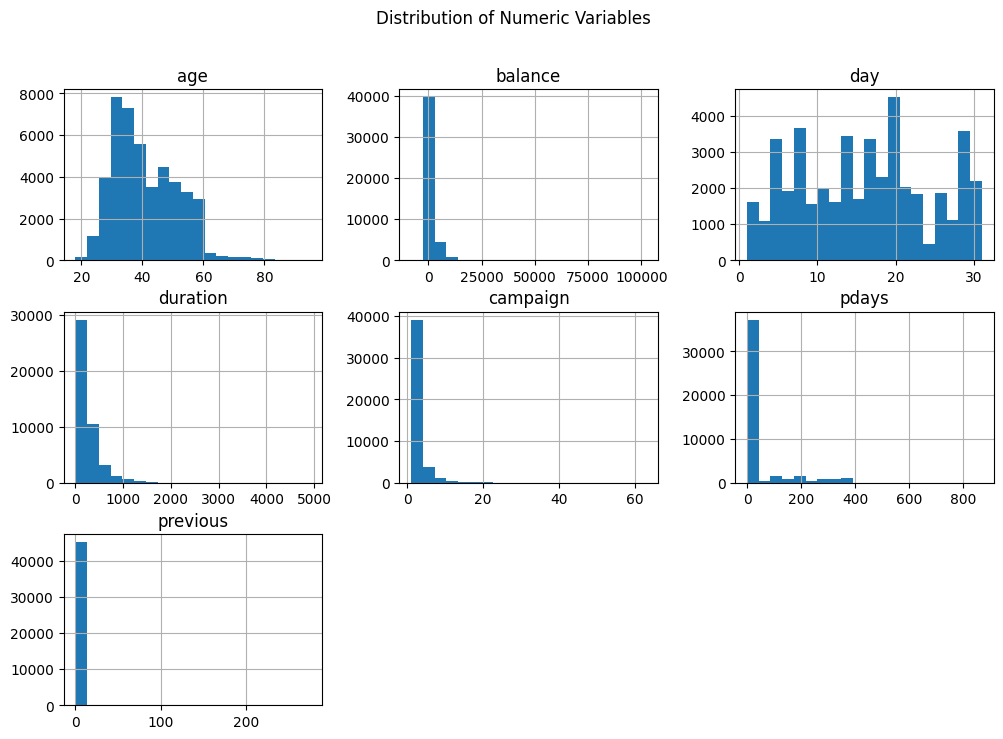

In [10]:
bank_df[numeric_cols].hist(bins = 20, figsize = (12,8))
plt.suptitle("Distribution of Numeric Variables")
plt.show()

-Age appears to be relatively concentrated between 28 and 41 years;
-Balance is strongly right-skewed, with most customers having lower balances and a few extreme values;
-The most frequent contact days of the month are between the 17th and 21st;
-Duration is highly right-skewed, with most calls lasting a short time;
-Campaign shows that most customers were contacted only a few times;
-Pdays have a strong concentration at value 0, with approximately 40.000 observations;
-Previous contacts are all 0, meaning that most clients had no prior interactions.

-The relationship between numeric variables and subscription (y).

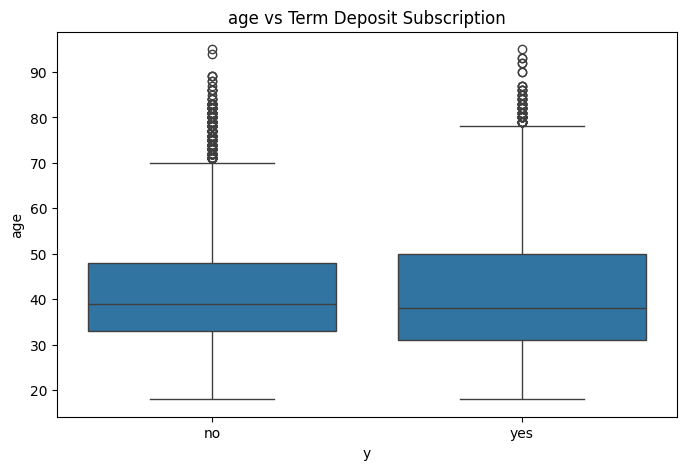

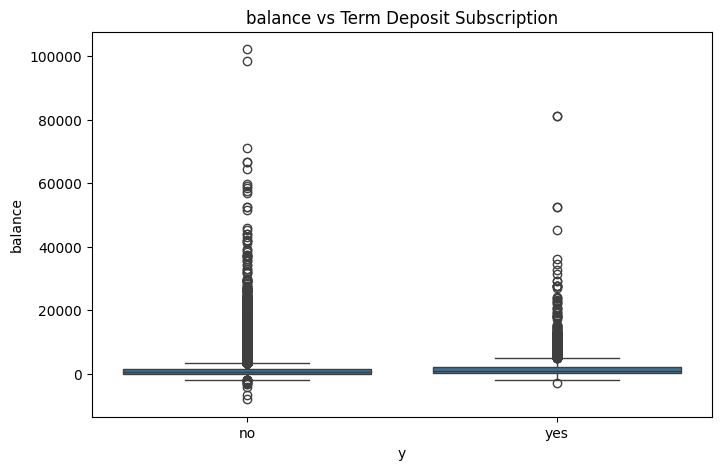

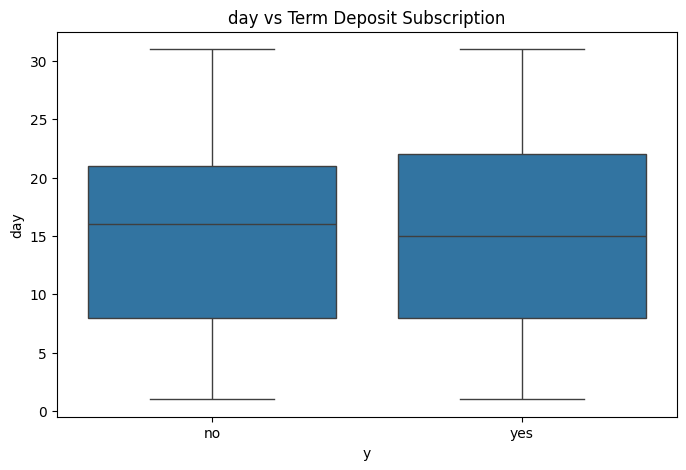

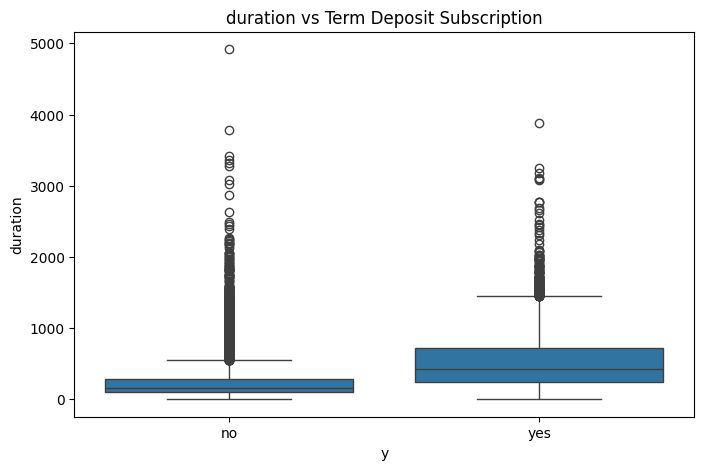

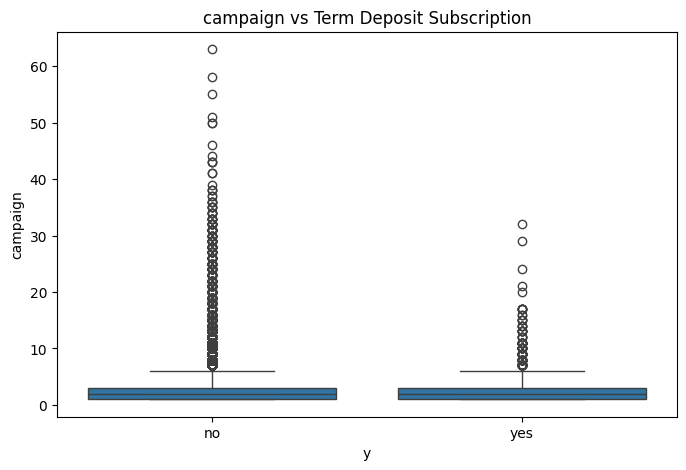

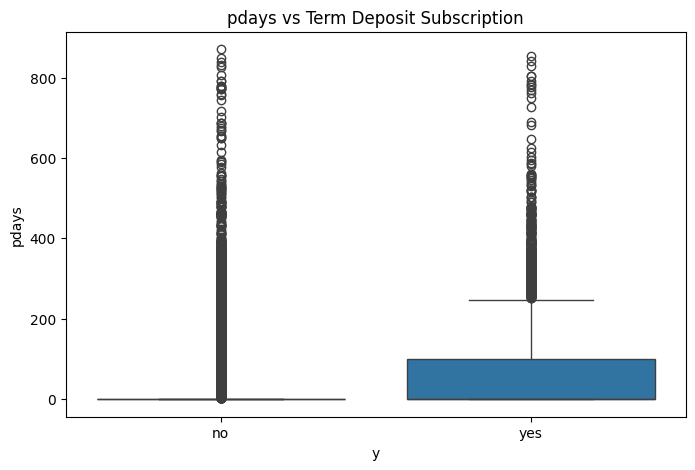

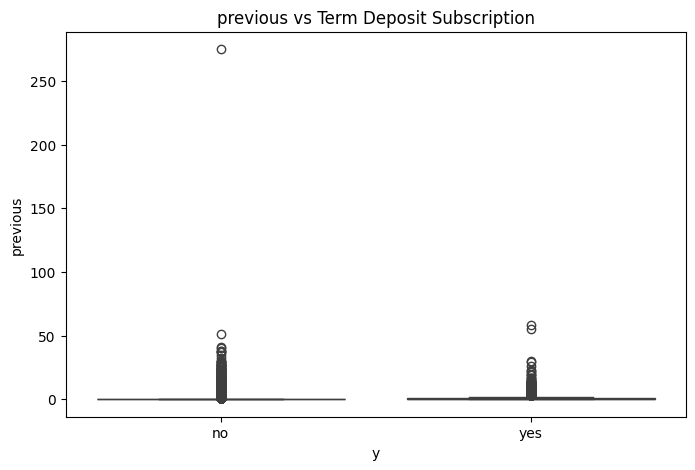

In [11]:
for col in numeric_cols:
    plt.figure(figsize = (8,5))
    sns.boxplot(x = 'y', y = col, data = bank_df)
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.show()

-The median age for both groups (subscribers and non-subscribers) is approximately 37-38 years. The interquartile range for non-subscribers is roughly between 33 and 48 years, while for subscribers it is slightly wider, approximately between 31 and 50 years. Overall, there is not a strong difference between the two groups, suggesting that it may not be a key factor in our analysis;
-Balance shows a slightly higher median for subscribed customers, suggesting that customers with higher accounts balances may be somewhat more likely to subscribe. Howerever, the difference is not significant;
-Customers who subscribed tend to have longer call durations compared to those who did not subscribe, so it's important to explain the benefits of using this type of subscription;
-The number of contacts during the campaign is not making a significant difference between the subscribers or non-subscribers.
-A relevant difference is at pdays, where the customers who were contacted more recently chose not to subscribe and the ones that were contacted a lot time ago chose to subscribe.
-Previous campaign interactions show limited impact, as most values are concentrated at 0.

-Categorical variables analysis.

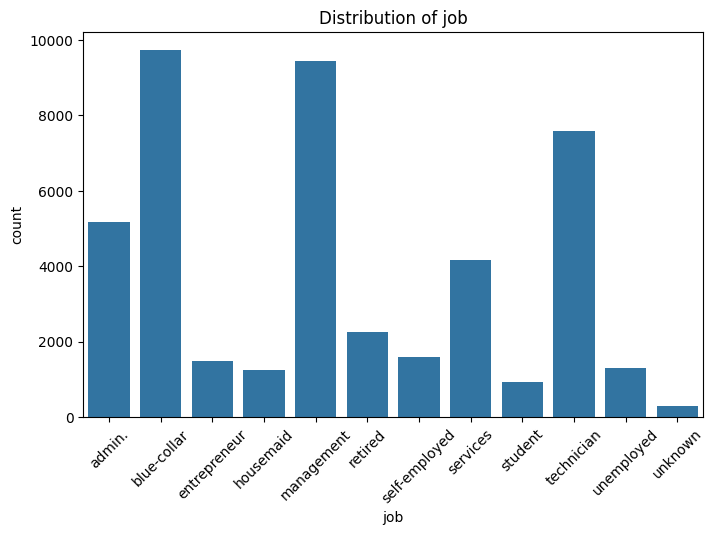

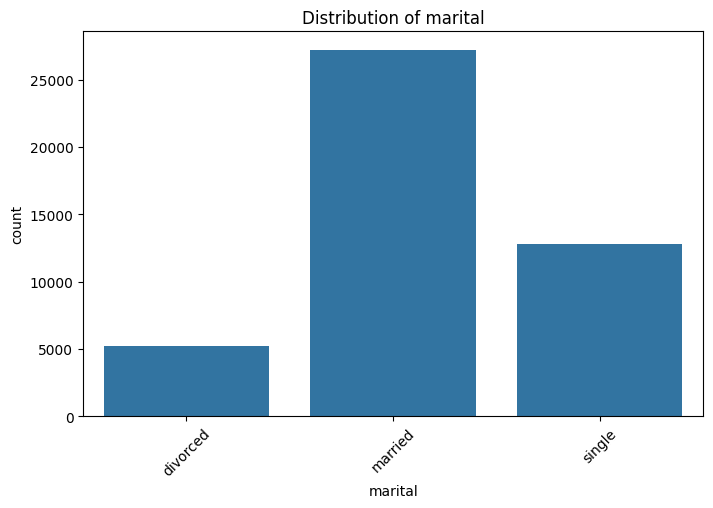

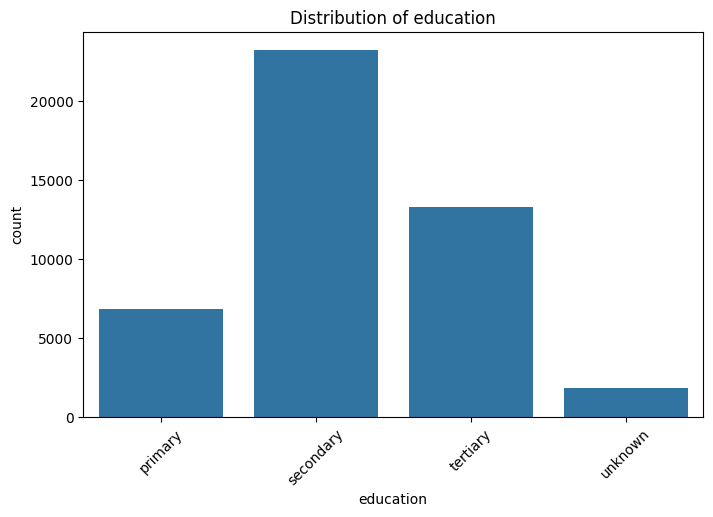

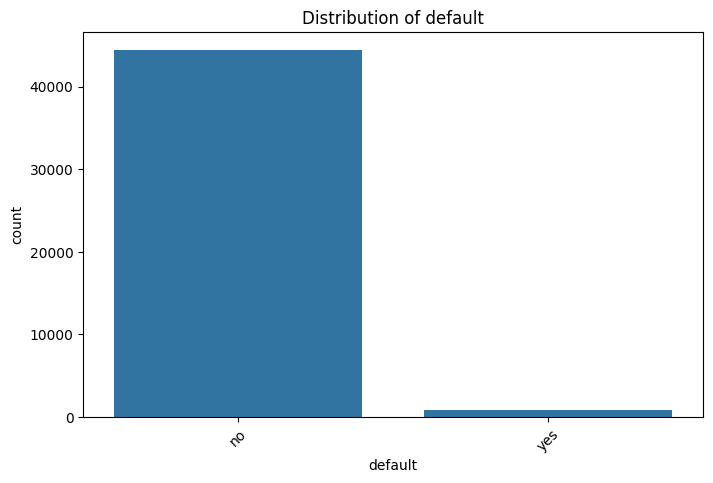

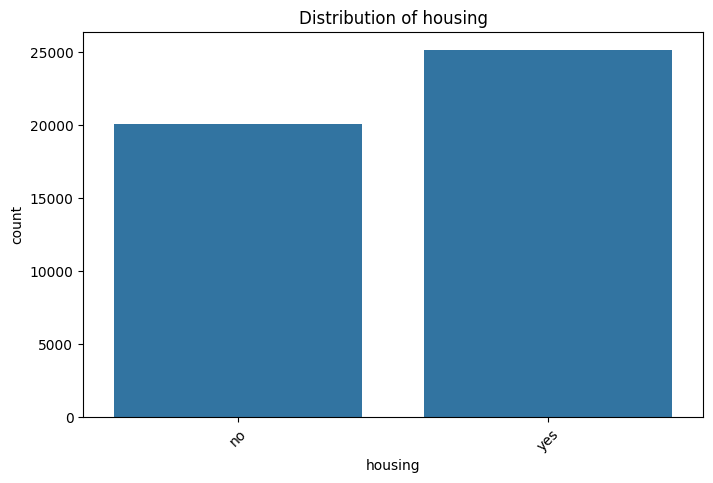

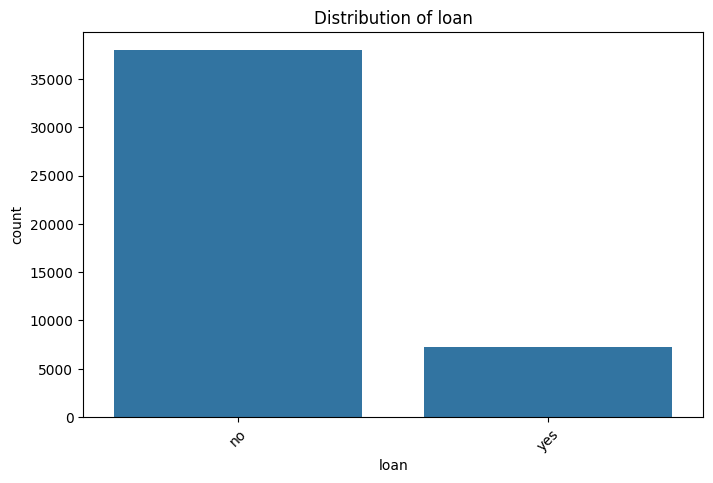

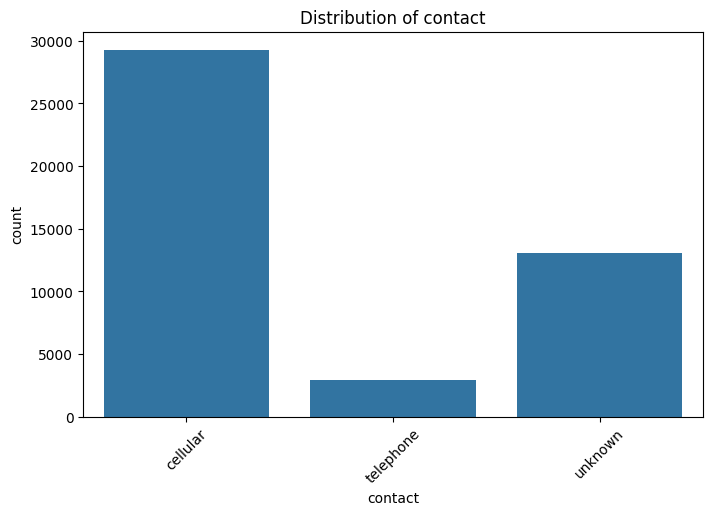

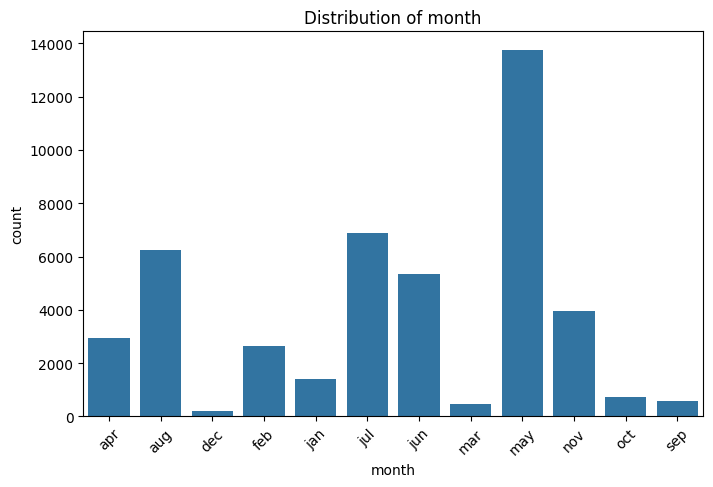

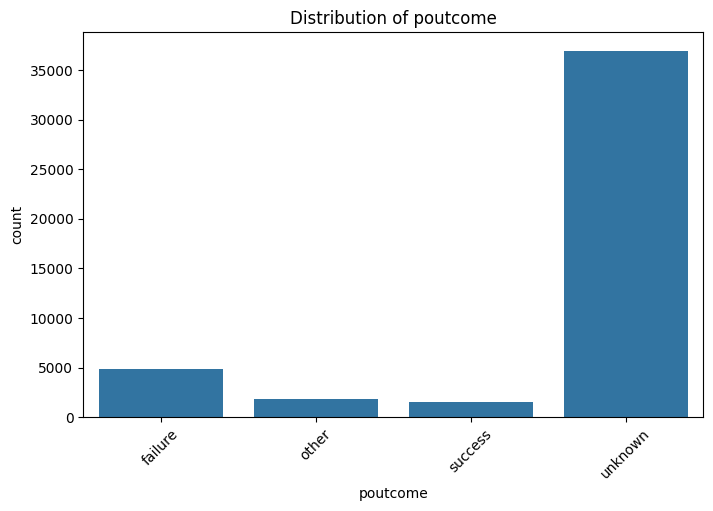

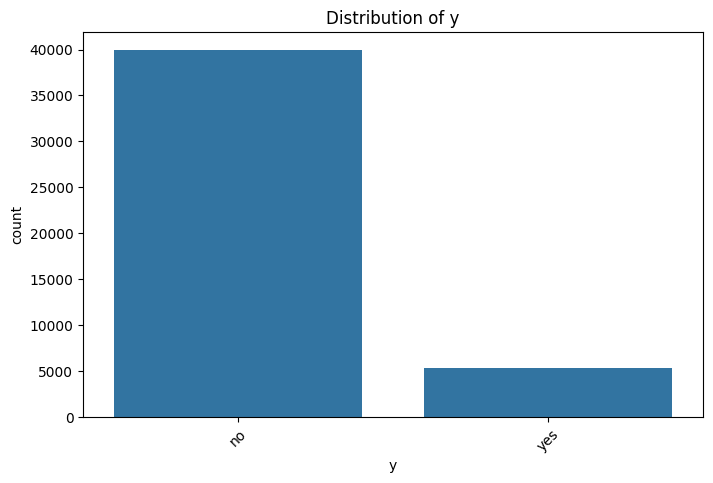

In [12]:
categorical_cols = bank_df.select_dtypes(include = 'category').columns
categorical_cols

for col in categorical_cols:
    plt.figure(figsize = (8,5))
    sns.countplot(data = bank_df, x = col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

-Most categorical variables show an uneven distribution, excepting the housing one, where the number of customers that have a loan contract at their house is slightly higher;
-Most contacts were contacted with a cellular phone, suggesting a modern communication channel preference;
-Marketing activity appears to be heavily concentrated in May, indicating a seasonal campaign pattern;
-Additionally, the previous campaign outcome is mostly marked as "Unknown", suggesting limited historical information for many customers;
-The target variable "y" is also clearly imbalanced, with a much higher proportion of non-subscribers compared to subscribers.

-The relationship between categorical variables and subscription (y).

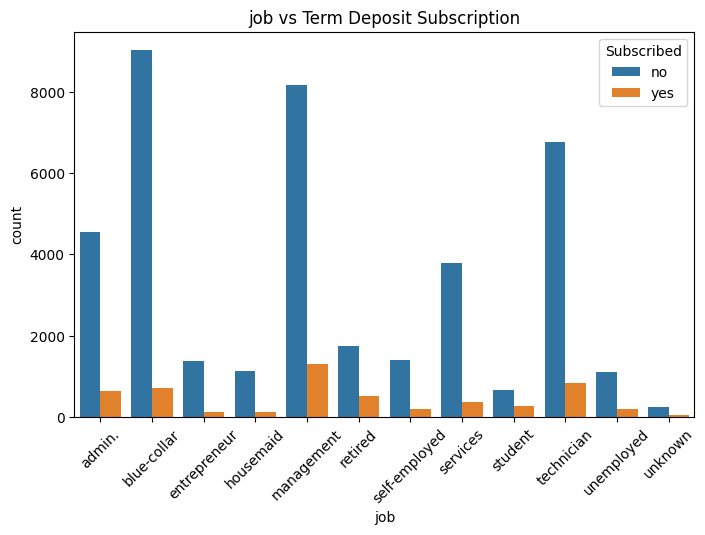

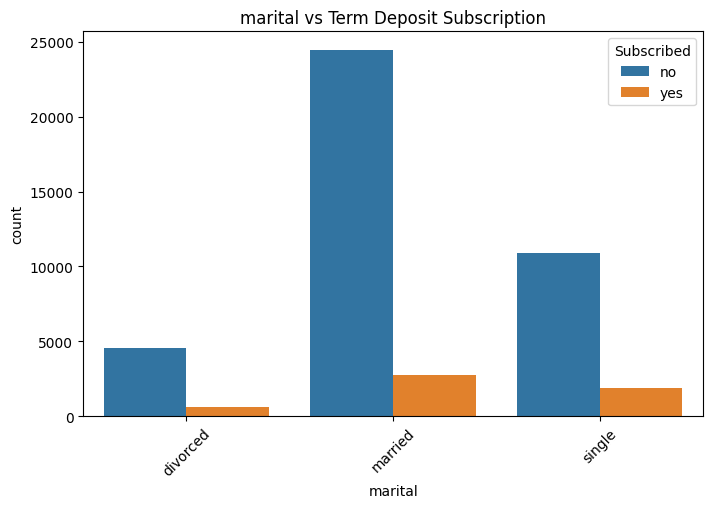

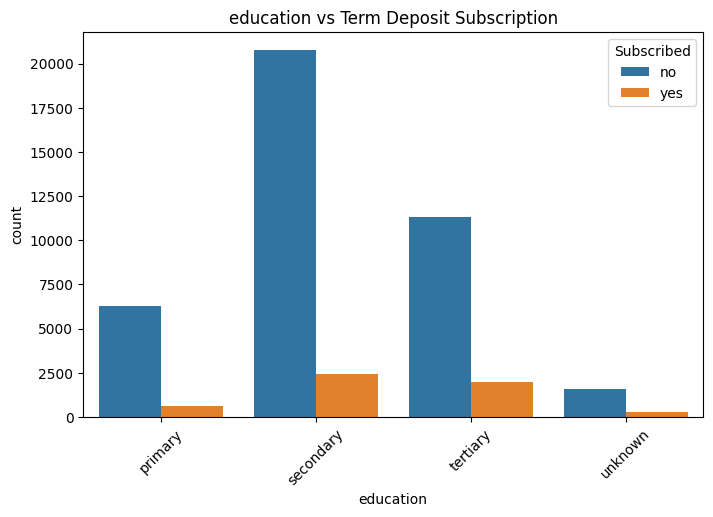

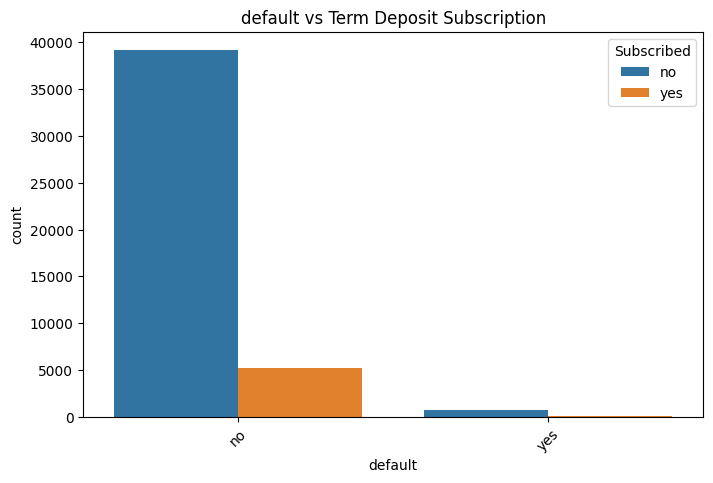

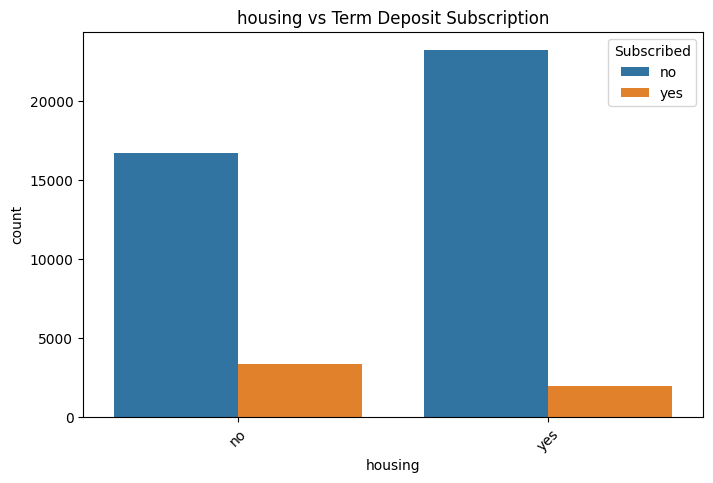

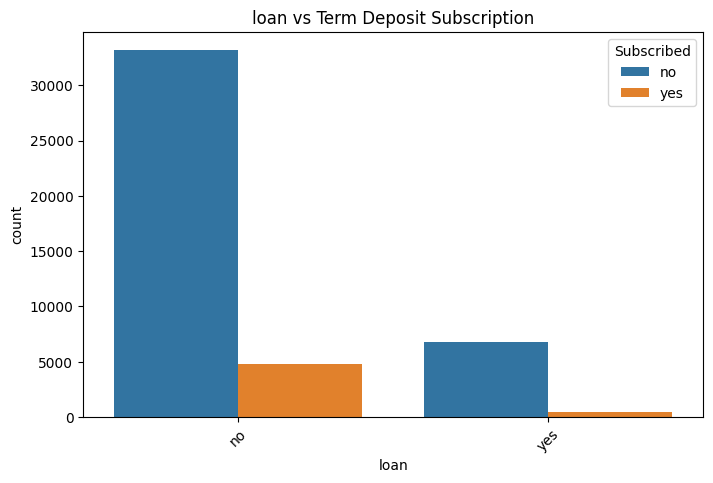

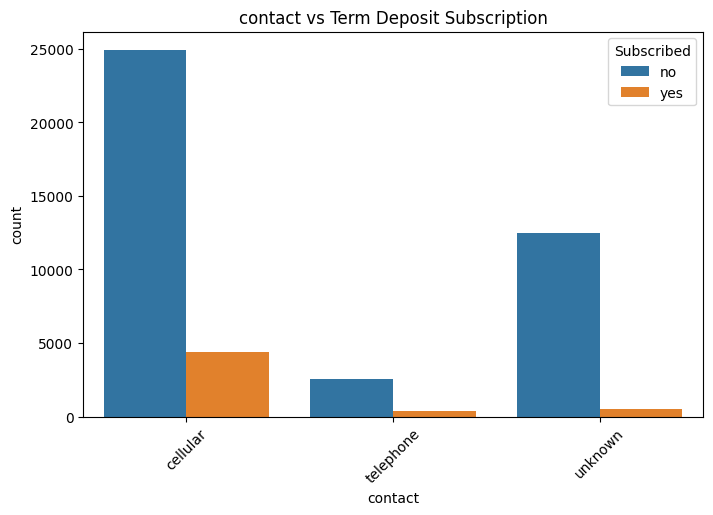

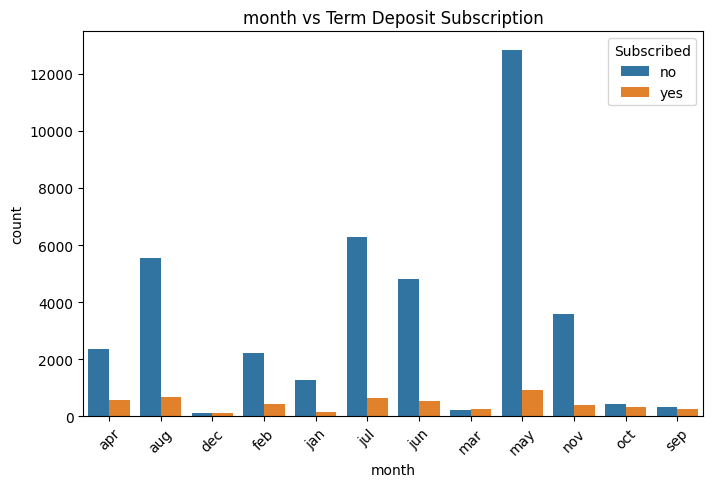

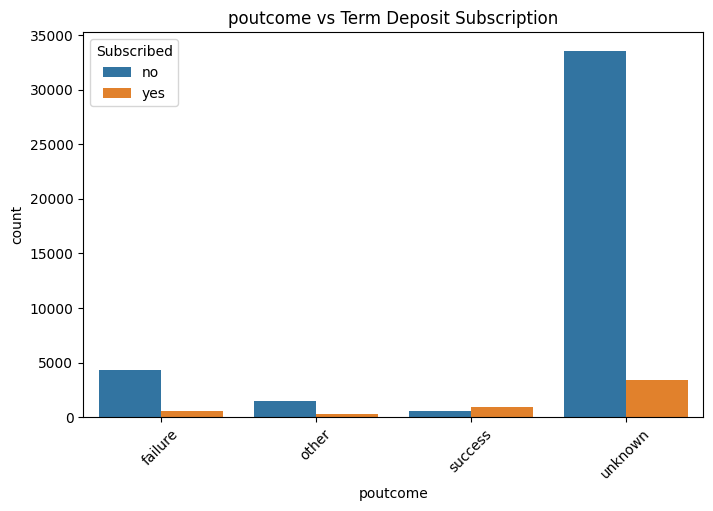

In [13]:
categorical_cols = bank_df.select_dtypes(include = 'category').columns.drop('y')
categorical_cols

for col in categorical_cols:
    plt.figure(figsize = (8,5))
    sns.countplot(data = bank_df, x = col, hue = 'y')
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.xticks(rotation = 45)
    plt.legend(title = 'Subscribed')
    plt.show()

-Married customers tend to subscribe more, but their count is the biggest one, so we can say that the best "yes/no" ratio is at the single customers;
-Customers contacted via cellular phone show a higher subscription rate compared to those contacted via telephone;
-The subscription rate seems higher among customers that are working in management, compared to blue-collar workers;
-Additionally, previous campaign outcomes as "success" are strongly associated with higher subscription rates;
-Customers who have their own houses tend to subscribe more, compared to those who do not;
-These patterns suggest that categorical variables may play an important role in predicting subscription behavior.

5. SUMMARY OF EXPLORATORY DATA ANALYSIS:

-The exploratory data analysis revealed several important patterns within the dataset;
-First, the target variable is clearly imbalanced, with a significantly higher proportion of non-subscribers compared to subscribers. This imbalance may influence model performance and should be considered during the modeling phase;
-Among numeric variables, call duration and pdays appears to have a strong relationship with subscription outcome, as longer calls are generally associated with higher subscription rates and as more days passed by from the previous call, the more the customers chose to subscribe;
-Regarding categorical variables, previous campaign outcome like "success", contact type "cellular" and certain job categories demonstrate a stronger association with subscription;
-Overall, both numeric and categorical variables show predictive potential and will be further processed and evaluated in the modeling stage.

6. PREDICTIVE MODELING

In this section, I'm building a classification model to predict whether a client will subscribe to a term deposit based on the available features. The goal is to evaluate how well I can predict subscription and understand the model's performance.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

6.1. Target variable preparation.

The target variable "y" contains categorical values ("yes" or "no") and for modeling purposes I converted it into binary format: yes->1, no->0.

In [15]:
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})

6.2. Feature and target separation.

I separated the dataset into: X - input features, Y - target variable.

In [16]:
X = bank_df.drop('y', axis = 1)
Y = bank_df['y']

6.3. Encoding categorical variables.

Machine Learning models cannot process text values directly so I applied One-Hot Encoding to transform categorical variables into numeric format.

In [17]:
X = pd.get_dummies(X, drop_first = True)
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True


6.4. Train-Test split.

I split the data into training and testing sets: 80% training data, 20% testing data. This allows me to evaluate model performance on unseen data.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, \
    random_state = 42)

6.5. Logistic regression model.

I used Logistic Regression as a baseline classification model.

In [19]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)

c:\Users\user1\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

6.6. Model evaluation

I evaluated the model using "Accuracy", "Confusion Matrix", "Classification Report".

In [20]:
Y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy:  0.8991485126617274

Confusion Matrix:
 [[7744  208]
 [ 704  387]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



6.7. Model interpretation.

The Logistic Regression model achieved an accuracy of approximately 90%, which initially sugests strong overall performance. However, looking deeper into the confusion matrix and classification report, I observe that the model performs significantly better at predicting non-subscribers (class 0) than subscribers (class 1).

For non-subscribers, recall is 97% meaning that the model correctly identifies almost all clients who did not subscribe and the precision is also high at 92%, indicating reliable predictions for this class.

For subscribers, precision is at 65% meaning when the model predicts a client will subscribe, it is correct about two-thirds of the time, but, however, recall is only 35% meaning that the model misses a large portion of actual subscribers.

This imbalance is likely caused by the dataset itself, where non-subscribers significantly outnumber subscribers.

To improve performance, future steps could include: handling class imbalance, testing more complex models such as Random Forest and adjusting classification thresholds.

Overall, Logistic Regression provides a solid baseline model, but improvements are needed to better identify potential subscribers.

7. THE NEW LOGISTIC REGRESSION MODEL (BALANCED)

7.1. Improving model performance - handling class imbalance.

The dataset is imbalanced, with significantly more non-subscribers than subscribers. To address this issue, we retrain Logistic Regression using "class_weight = 'balanced'", which adjusts weights inversely proportional to class frequencies.

In [23]:
model_balanced = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
model_balanced.fit(X_train, Y_train)

Y_pred_balanced = model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_balanced))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_balanced))

Accuracy: 0.8368904124737366

Confusion Matrix:
 [[6665 1287]
 [ 188  903]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      7952
           1       0.41      0.83      0.55      1091

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.90      0.84      0.86      9043



c:\Users\user1\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7.2. Random Forest model.

Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions. It is capable of capturing more complex patterns than Logistic Regression.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf))

Accuracy: 0.9031294924250802

Confusion Matrix:
 [[7800  152]
 [ 724  367]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.71      0.34      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



7.3. Model comparison section.

We trained and evaluated three models in this project: Logistic Regression (baseline), Logistic Regression (balanced) and Random Forest.

7.3.1. Logistic Regression (baseline)

The baseline model achieved high overall accuracy (~90%), but recall for subscribers, class 1, was very low, only 35%. This means that the model failed to identify a large number of potential subscribing customers.

7.3.2. Logistic Regression (balanced)

After applying class weighting to handle dataset imbalance, the recall for subscribers improved significantly to 83%, accuracy decreased slightly to 84% and precision for subscribers dropped to 41%. This model is much better at identifying potential subscribers, but it also generates more false positives.

7.3.3. Random Forest

Random Forest achieved high overall accuracy (~90%) and high precision for subscribers, 71%, meaning when it predicts a subscription, is is often correct.
However, recall for subscribers remained low, only 34%, similar to the baseline logistic regression and this indicates that the model stil misses many actual subscribers.

7.4. Final Business Interpretation

If the goal of the bank is to maximize detection of potential subscribers, the balanced Logistic Regression model is preferable due to its high recall, 83%.
If the goal is to reduce unnecessary marketing efforts and avoid contacting unlikely customers, Random Forest may be preferable due to its higher precision.
Overall, handling class imbalance had a larger impact on subscriber detection than switching to a more complex model.

8. FINAL CONCLUSION

In this project, we analyzed a bank marketing dataset to understand the factors influencing customer subscription to term deposits and built predictive models to support marketing decisions.

Exploratory Data Analysis revealed strong class imbalance and highlighted features such as call duration as highly correlated with subscription outcomes.

We trained three models: baseline Logistic Regression, Logistic Regression with balancing and Random Forest. While baseline models achieved high overall accuracy (~90%), they struggled to correctly identify actual subscribers.

After addresing class imbalance, the balanced Logistic Regression significantly improved recall for subscribers (83%), making it more suitable when the business objective is to identify as many potential customers as possible.

Overall, this project demonstrates the importance of looking beyond accuracy, handling imbalanced data properly, and aligning model selection with business objectives.